In [3]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
#Leemos los datos correspondientes a los tickets de la zona SER

file_pattern = '../Data_Parquet/tiques_*.parquet'
file_list = glob.glob(file_pattern)

if not file_list:
    raise FileNotFoundError(f'No se encontraron archivos que coincidan con el patrón {file_pattern}')

aux = []
for file in file_list:
    aux_df = pd.read_parquet(file)
    aux.append(aux_df)

df_ser = pd.concat(aux, ignore_index=True)
df_ser.head()

,matricula_parquimetro,fecha_operacion,fecha_inicio,fecha_fin,cod_distrito,distrito,cod_barrio,barrio,tipo_zona,distintivo,minutos_tique,importe_tique
0,703130002,2022-02-23 20:26:24,2022-02-23 20:26:24,2022-02-24 11:00:24,3,RETIRO,1,PACÍFICO,AZUL,ECO,154,1.00
1,302230080,2022-03-03 17:21:30,2022-03-03 17:21:30,2022-03-03 17:42:30,2,ARGANZUELA,2,ACACIAS,VERDE,C,21,0.50
2,703130050,2022-03-10 08:54:11,2022-03-10 09:00:00,2022-03-10 13:00:00,3,RETIRO,1,PACÍFICO,AZUL,B,240,9.85
3,APP-MOVIL,2022-01-22 11:30:57,2022-01-22 11:30:55,2022-01-22 11:44:55,2,ARGANZUELA,6,PALOS DE MOGUER,VERDE,C,14,0.30
4,APP-MOVIL,2022-02-17 11:59:48,2022-02-17 11:59:47,2022-02-17 13:04:47,5,CHAMARTIN,3,CIUDAD JARDÍN,AZUL,ECO,65,0.30


In [3]:
df_ser.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98292491 entries, 0 to 98292490
Data columns (total 12 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   matricula_parquimetro  98292491 non-null  object        
 1   fecha_operacion        98292491 non-null  datetime64[ns]
 2   fecha_inicio           98292491 non-null  datetime64[ns]
 3   fecha_fin              98292491 non-null  datetime64[ns]
 4   cod_distrito           98292491 non-null  int8          
 5   distrito               98292491 non-null  object        
 6   cod_barrio             98292491 non-null  int8          
 7   barrio                 98292491 non-null  object        
 8   tipo_zona              98292491 non-null  object        
 9   distintivo             98292491 non-null  object        
 10  minutos_tique          98292491 non-null  int32         
 11  importe_tique          98292490 non-null  float64       
dtypes: datetime6

In [4]:
df_ser.isnull().sum()

matricula_parquimetro    0
fecha_operacion          0
fecha_inicio             0
fecha_fin                0
cod_distrito             0
distrito                 0
cod_barrio               0
barrio                   0
tipo_zona                0
distintivo               0
minutos_tique            0
importe_tique            1
dtype: int64

In [5]:
df_ser.describe()

,fecha_operacion,fecha_inicio,fecha_fin,cod_distrito,cod_barrio,minutos_tique,importe_tique
count,98292491,98292491,98292491,9.829249e+07,9.829249e+07,9.829249e+07,9.829249e+07
mean,2023-02-25 08:40:49.770369280,2023-02-25 08:53:39.182759936,2023-02-25 11:10:24.359614464,5.457207e+00,3.451737e+00,7.144063e+01,1.344233e+00
min,2022-01-01 00:45:41,1970-01-02 09:00:44,1970-01-02 10:05:44,1.000000e+00,0.000000e+00,-1.800000e+01,-1.200000e+00
25%,2022-07-28 20:03:56,2022-07-28 20:05:00,2022-07-28 20:59:28,4.000000e+00,2.000000e+00,2.800000e+01,3.500000e-01
50%,2023-03-01 12:00:09,2023-03-01 12:01:00,2023-03-01 13:14:15,5.000000e+00,4.000000e+00,5.300000e+01,1.000000e+00
75%,2023-09-25 13:39:57,2023-09-25 13:41:00,2023-09-25 14:57:45,7.000000e+00,5.000000e+00,9.200000e+01,1.900000e+00
max,2024-03-31 23:59:53,2024-04-01 11:31:00,2024-07-02 09:14:02,3.000000e+01,8.000000e+00,8.921000e+04,8.388688e+04
std,NaN,NaN,NaN,2.875955e+00,1.748248e+00,7.376068e+01,8.577631e+00


In [6]:
replace_dict = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'}

remove_accents = lambda x: ''.join(replace_dict.get(c, c) for c in x) if isinstance(x, str) else x

df_ser = df_ser.replace('None', np.nan)
df_ser.loc[df_ser['fecha_operacion'] < pd.Timestamp('2022-01-01'), 'fecha_operacion'] = pd.NaT
df_ser.loc[df_ser['fecha_inicio'] < pd.Timestamp('2022-01-01'), 'fecha_inicio'] = pd.NaT
df_ser.loc[df_ser['fecha_fin'] < pd.Timestamp('2022-01-01'), 'fecha_fin'] = pd.NaT
df_ser['tipo_zona'] = df_ser['tipo_zona'].apply(remove_accents) 


In [7]:
df_ser.isnull().sum()

matricula_parquimetro         0
fecha_operacion               0
fecha_inicio                  2
fecha_fin                     2
cod_distrito                  0
distrito                 858313
cod_barrio                    0
barrio                        0
tipo_zona                 88205
distintivo                    0
minutos_tique                 0
importe_tique                 1
dtype: int64

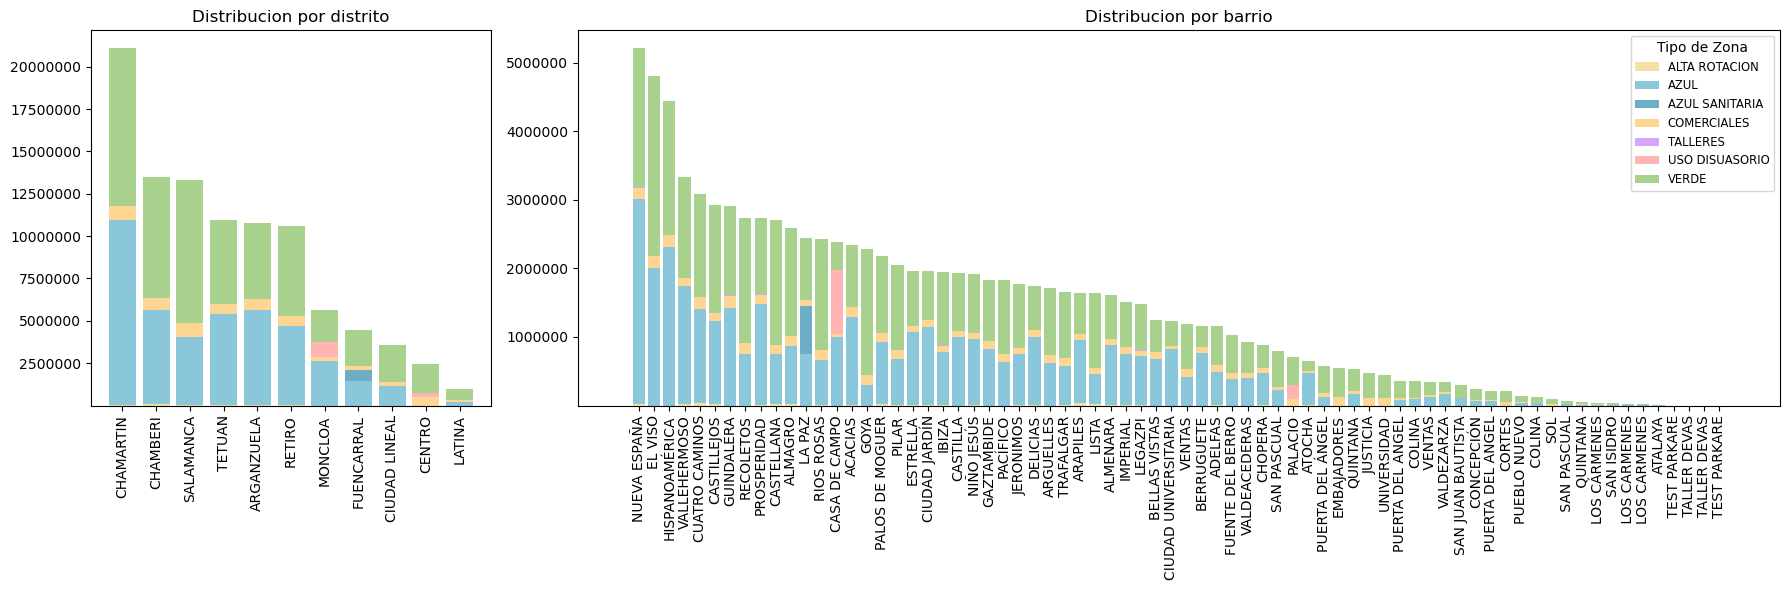

In [8]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

plt.figure(figsize=(18, 6))
grid = plt.GridSpec(1, 2, width_ratios=[1, 3])

# Primer subplot: Distribucion del distrito
grouped_df_ser = df_ser.dropna(subset=['distrito', 'tipo_zona']).query("distrito != 'ALTA ROTACION'").groupby(['distrito', 'tipo_zona']).size().reset_index(name='count')
pivoted_df_ser = grouped_df_ser.pivot(index='distrito', columns='tipo_zona', values='count').fillna(0)
pivoted_df_ser = pivoted_df_ser.loc[pivoted_df_ser.sum(axis=1).sort_values(ascending=False).index]

ax1 = plt.subplot(grid[0])
bottom1 = None
for col in pivoted_df_ser.columns:
    ax1.bar(pivoted_df_ser.index, pivoted_df_ser[col], bottom=bottom1, label=col, color=palette.get(col, '#333333'))
    if bottom1 is None:
        bottom1 = pivoted_df_ser[col].values
    else:
        bottom1 += pivoted_df_ser[col].values
ax1.set_title('Distribucion por distrito')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)
ax1.ticklabel_format(style='plain', axis='y')

# Segundo subplot: Distribucion del barrio
grouped_df_ser = df_ser.dropna(subset=['barrio', 'tipo_zona']).groupby(['barrio', 'tipo_zona']).size().reset_index(name='count')
pivoted_df_ser = grouped_df_ser.pivot(index='barrio', columns='tipo_zona', values='count').fillna(0)
pivoted_df_ser = pivoted_df_ser.loc[pivoted_df_ser.sum(axis=1).sort_values(ascending=False).index]

ax2 = plt.subplot(grid[1])
bottom2 = None
for col in pivoted_df_ser.columns:
    ax2.bar(pivoted_df_ser.index, pivoted_df_ser[col], bottom=bottom2, label=col, color=palette.get(col, '#333333'))
    if bottom2 is None:
        bottom2 = pivoted_df_ser[col].values
    else:
        bottom2 += pivoted_df_ser[col].values

ax2.set_title('Distribucion por barrio')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(title='Tipo de Zona', loc='upper right', fontsize='small')
ax2.tick_params(axis='x', rotation=90)
ax2.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


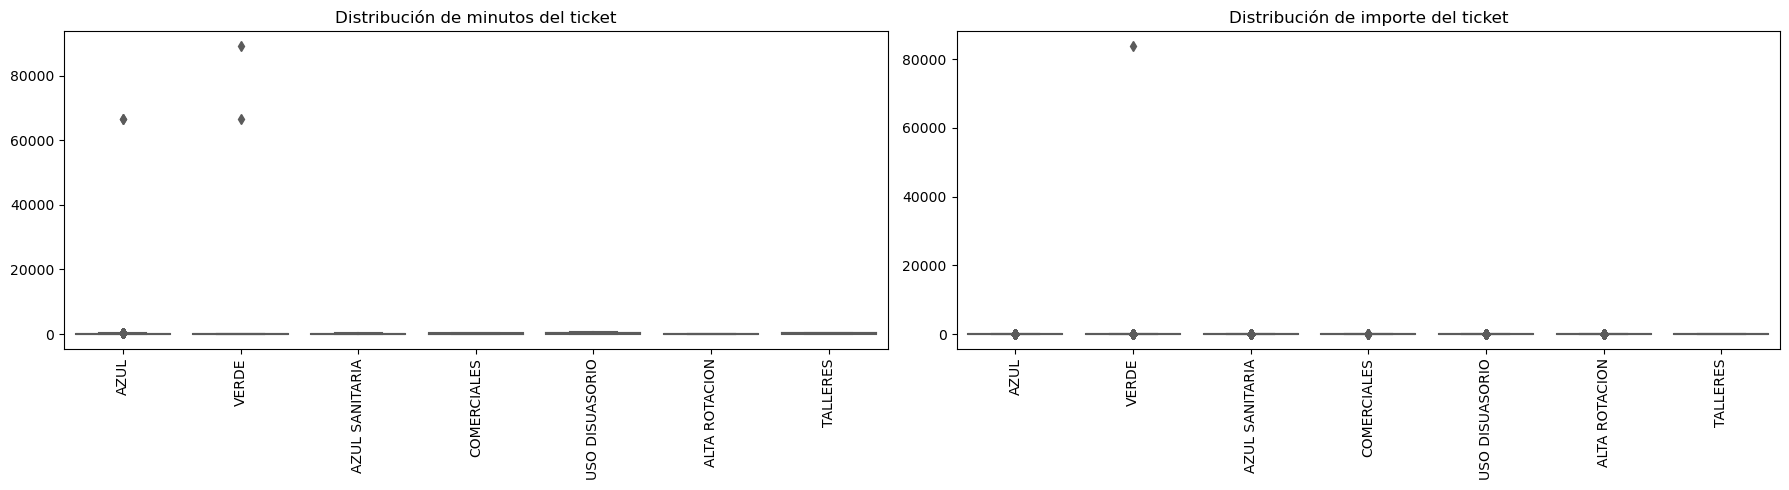

In [9]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

fig = plt.figure(figsize=(18, 5))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1])

# Primer subplot: Minutos tique
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=df_ser, x='tipo_zona', y='minutos_tique', palette=palette, ax=ax1)
ax1.set_title('Distribución de minutos del ticket')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)

# Segundo subplot: Importe tique
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=df_ser, x='tipo_zona', y='importe_tique', palette=palette, ax=ax2)
ax2.set_title('Distribución de importe del ticket')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

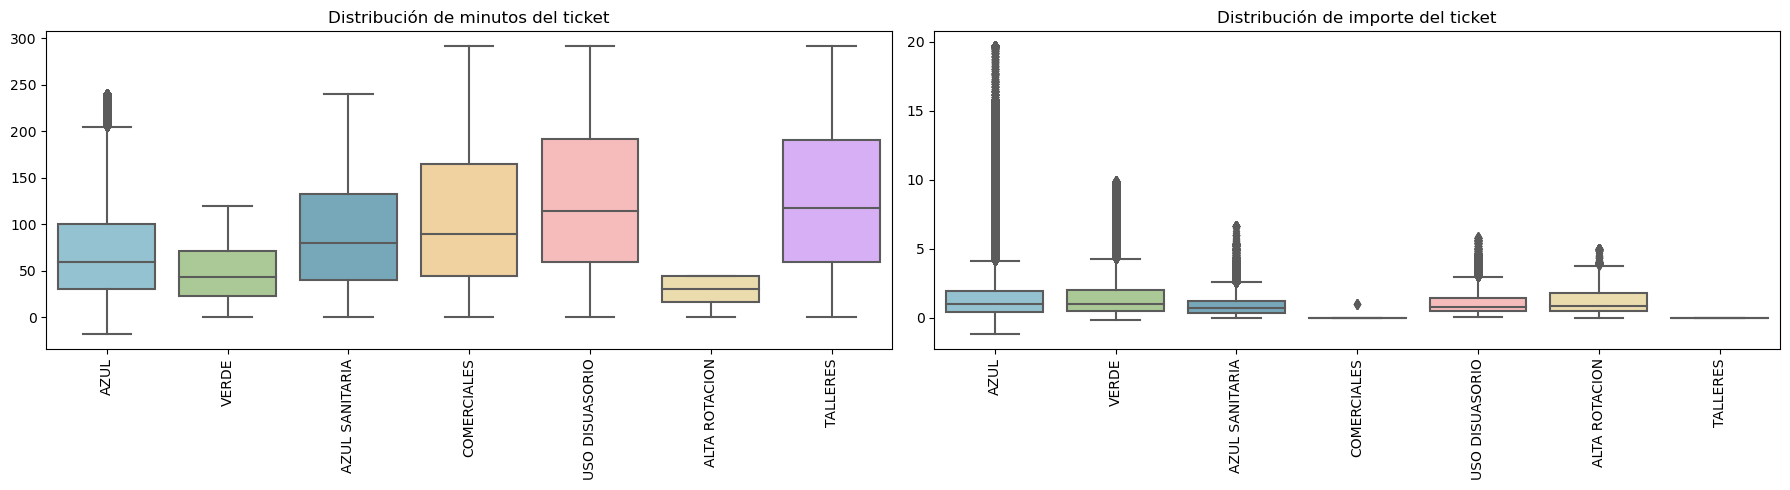

In [6]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

def remove_outliers(df, column, zscore):
    mean = df[column].mean()
    std_dev = df[column].std()
    
    return df[(df[column] >= mean - zscore * std_dev) & (df[column] <= mean + zscore * std_dev)]

df_filtered = remove_outliers(remove_outliers(df_ser, 'minutos_tique', 3), 'importe_tique', 3)

fig = plt.figure(figsize=(18, 5))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1])

# Primer subplot: Minutos tique
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=df_filtered, x='tipo_zona', y='minutos_tique', palette=palette, ax=ax1)
ax1.set_title('Distribución de minutos del ticket')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)

# Segundo subplot: Importe tique
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=df_filtered, x='tipo_zona', y='importe_tique', palette=palette, ax=ax2)
ax2.set_title('Distribución de importe del ticket')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

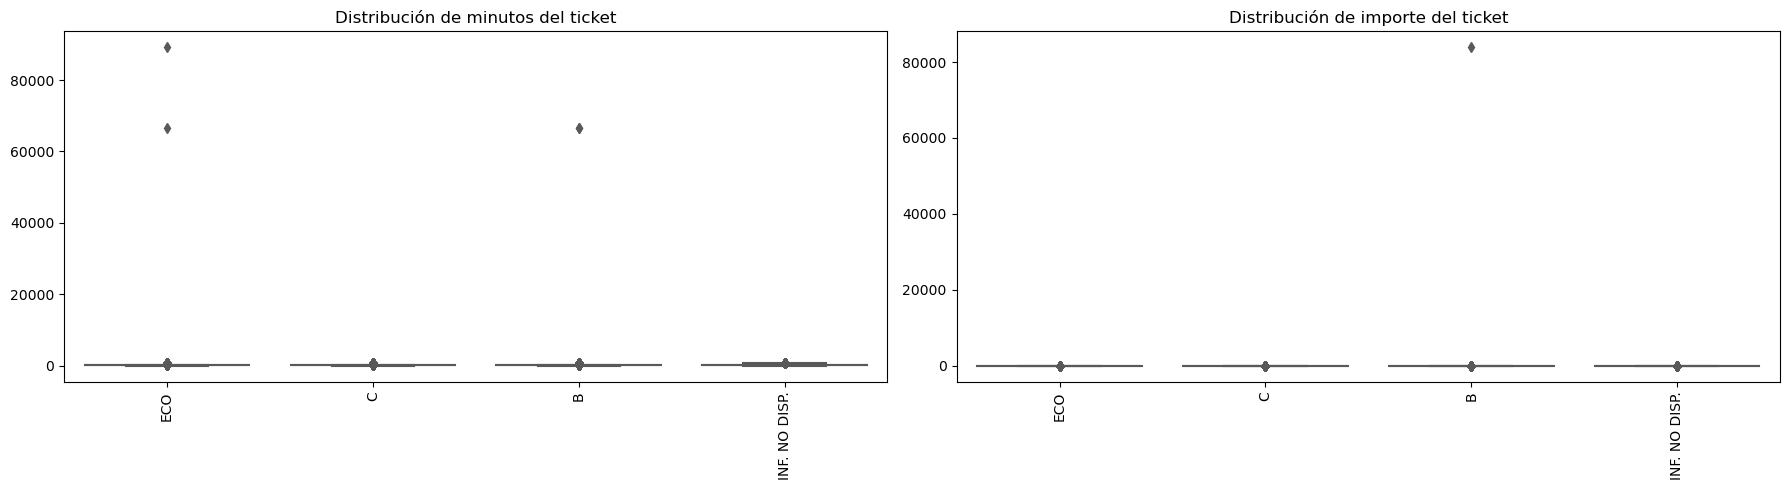

In [7]:
fig = plt.figure(figsize=(18, 5))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1])

# Primer subplot: Minutos tique
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=df_ser, x='distintivo', y='minutos_tique', palette='Set2', ax=ax1)
ax1.set_title('Distribución de minutos del ticket')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)
ax1_tick_labels = ax1.get_xticklabels()
ax1.set_xticklabels('INF. NO DISP.' if label.get_text() == 'INFORMACION NO DISPONIBLE' else label.get_text() for label in ax1_tick_labels)

# Segundo subplot: Importe tique
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=df_ser, x='distintivo', y='importe_tique', palette='Set2', ax=ax2)
ax2.set_title('Distribución de importe del ticket')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=90)
ax2_tick_labels = ax2.get_xticklabels()
ax2.set_xticklabels('INF. NO DISP.' if label.get_text() == 'INFORMACION NO DISPONIBLE' else label.get_text() for label in ax2_tick_labels)

plt.tight_layout()
plt.show()

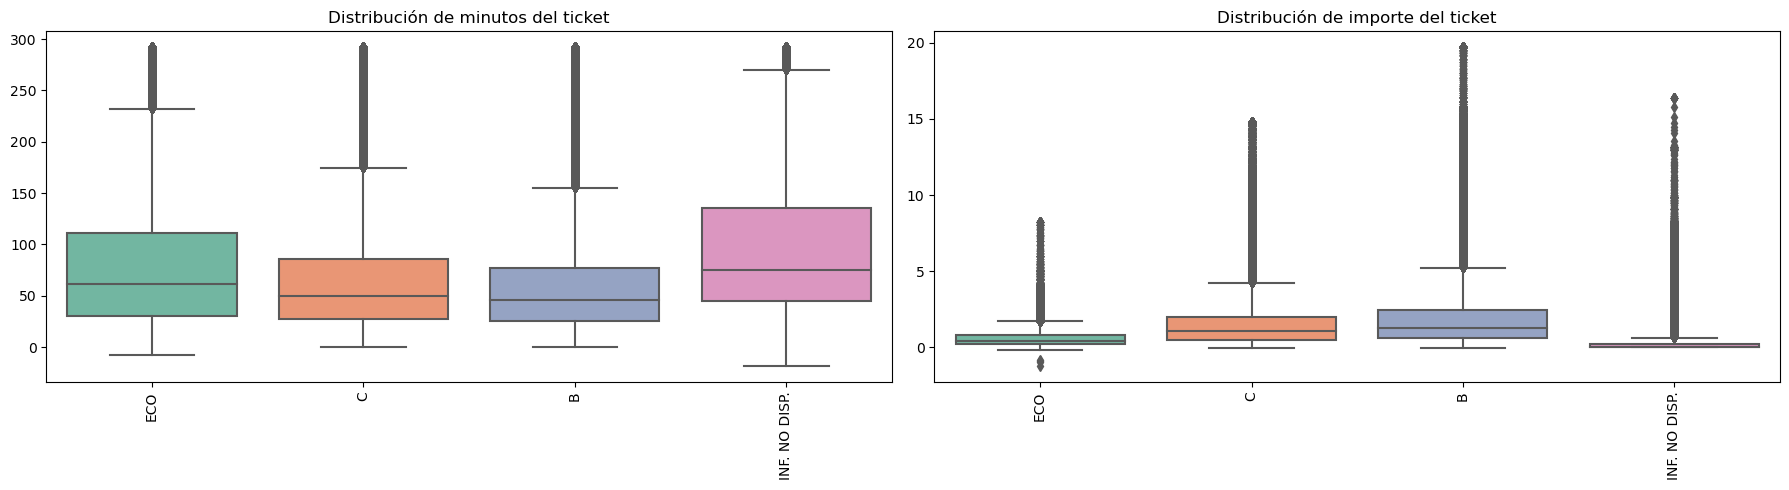

In [11]:
def remove_outliers(df, column, zscore):
    mean = df[column].mean()
    std_dev = df[column].std()
    
    return df[(df[column] >= mean - zscore * std_dev) & (df[column] <= mean + zscore * std_dev)]

df_filtered = remove_outliers(remove_outliers(df_ser, 'minutos_tique', 3), 'importe_tique', 3)

fig = plt.figure(figsize=(18, 5))
gs = plt.GridSpec(1, 2, width_ratios=[1, 1])

# Primer subplot: Minutos tique
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=df_filtered, x='distintivo', y='minutos_tique', palette='Set2', ax=ax1)
ax1.set_title('Distribución de minutos del ticket')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)
ax1_tick_labels = ax1.get_xticklabels()
ax1.set_xticklabels('INF. NO DISP.' if label.get_text() == 'INFORMACION NO DISPONIBLE' else label.get_text() for label in ax1_tick_labels)

# Segundo subplot: Importe tique
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=df_filtered, x='distintivo', y='importe_tique', palette='Set2', ax=ax2)
ax2.set_title('Distribución de importe del ticket')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=90)
ax2_tick_labels = ax2.get_xticklabels()
ax2.set_xticklabels('INF. NO DISP.' if label.get_text() == 'INFORMACION NO DISPONIBLE' else label.get_text() for label in ax2_tick_labels)

plt.tight_layout()
plt.show()

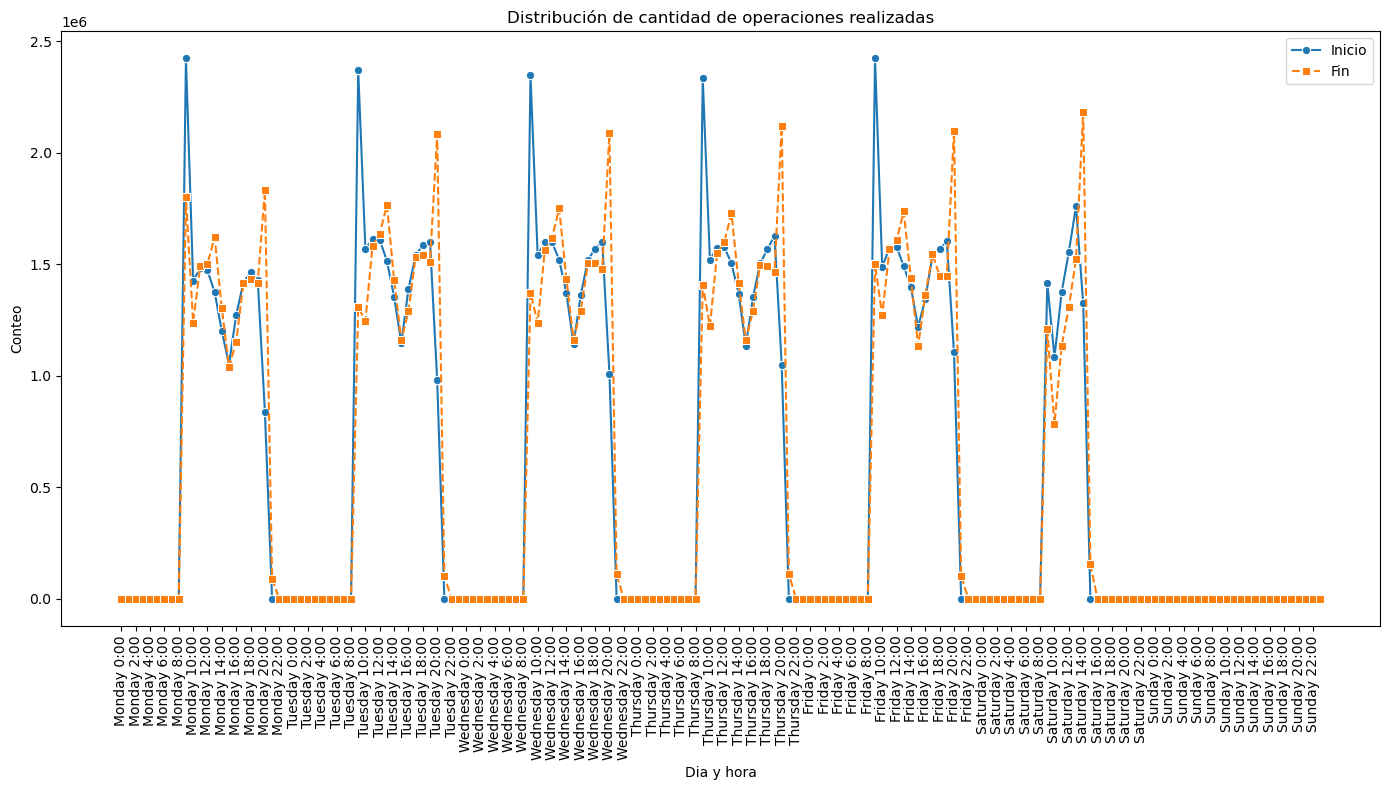

In [12]:
df_ser['dia_inicio'] = df_ser['fecha_inicio'].dt.day_name()
df_ser['hora_inicio'] = df_ser['fecha_inicio'].dt.hour
df_ser['dia_fin'] = df_ser['fecha_fin'].dt.day_name()
df_ser['hora_fin'] = df_ser['fecha_fin'].dt.hour

df_inicio_counts = df_ser.groupby(['dia_inicio', 'hora_inicio']).size().reset_index(name='cuenta').sort_values(by=['dia_inicio', 'hora_inicio'])
df_fin_counts = df_ser.groupby(['dia_fin', 'hora_fin']).size().reset_index(name='cuenta').sort_values(by=['dia_fin', 'hora_fin'])


all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
all_hours = list(range(0, 24))
combinaciones = [(day, hour) for day in all_days for hour in all_hours]
df_combinations = pd.DataFrame(combinaciones, columns=['dia', 'hora'])

df_inicio_complete = pd.merge(df_combinations, df_inicio_counts, left_on=['dia', 'hora'], right_on=['dia_inicio', 'hora_inicio'], how='left').drop(columns=['dia_inicio', 'hora_inicio'], axis=1)
df_inicio_complete['cuenta'].fillna(0, inplace=True)
df_inicio_complete['dia_y_hora'] = df_inicio_complete['dia'] + ' ' + df_inicio_complete['hora'].astype(str) + ':00'

df_fin_complete = pd.merge(df_combinations, df_fin_counts, left_on=['dia', 'hora'], right_on=['dia_fin', 'hora_fin'], how='left').drop(columns=['dia_fin', 'hora_fin'], axis=1)
df_fin_complete['cuenta'].fillna(0, inplace=True)
df_fin_complete['dia_y_hora'] = df_fin_complete['dia'] + ' ' + df_fin_complete['hora'].astype(str) + ':00'


plt.figure(figsize=(14, 8))

sns.lineplot(data=df_inicio_complete, x='dia_y_hora', y='cuenta', marker='o', linestyle='-', label='Inicio')
sns.lineplot(data=df_fin_complete, x='dia_y_hora', y='cuenta', marker='s', linestyle='--', label='Fin')
plt.title('Distribución de cantidad de operaciones realizadas')
plt.gca().set_xticks(plt.gca().get_xticks()[::2])
plt.xlabel('Dia y hora')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

### Datos zona ser

In [4]:
#Leemos los datos correspondientes a las calles con sus respectivos huecos de zona ser

file_pattern = '../Data_Parquet/calles_SER_*.parquet'
file_list = glob.glob(file_pattern)

if not file_list:
    raise FileNotFoundError(f'No se encontraron archivos que coincidan con el patrón {file_pattern}')

aux = []
for file in file_list:
    aux_df = pd.read_parquet(file)
    aux_df['ano'] = file.split('_')[-1].split('.')[0]
    aux.append(aux_df)
    
df_calles = pd.concat(aux, ignore_index=True)
df_calles.head()

,gis_x,gis_y,distrito,barrio,calle,num_finca,color,bateria_linea,num_plazas,ano
0,439592.91,4473566.23,01 CENTRO,01-01 PALACIO,"AGUAS, CALLE, DE LAS",2.0,077214010 Verde,Línea,7.0,2022
1,439569.07,4473598.77,01 CENTRO,01-01 PALACIO,"AGUAS, CALLE, DE LAS",8.0,077214010 Verde,Línea,5.0,2022
2,439577.66,4473498.04,01 CENTRO,01-01 PALACIO,"AGUILA, CALLE, DEL",3.0,077214010 Verde,Línea,2.0,2022
3,439559.19,4473471.82,01 CENTRO,01-01 PALACIO,"AGUILA, CALLE, DEL",12.0,077214010 Verde,Línea,9.0,2022
4,439536.49,4473428.32,01 CENTRO,01-01 PALACIO,"AGUILA, CALLE, DEL",17.0,077214010 Verde,Línea,4.0,2022


In [5]:
df_calles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95316 entries, 0 to 95315
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gis_x          95316 non-null  float64
 1   gis_y          95316 non-null  float64
 2   distrito       95316 non-null  object 
 3   barrio         95316 non-null  object 
 4   calle          95316 non-null  object 
 5   num_finca      84629 non-null  float64
 6   color          95316 non-null  object 
 7   bateria_linea  95316 non-null  object 
 8   num_plazas     95314 non-null  float64
 9   ano            95316 non-null  object 
dtypes: float64(4), object(6)
memory usage: 7.3+ MB


In [6]:
df_calles.isnull().sum()

gis_x                0
gis_y                0
distrito             0
barrio               0
calle                0
num_finca        10687
color                0
bateria_linea        0
num_plazas           2
ano                  0
dtype: int64

In [7]:
df_calles.describe()

,gis_x,gis_y,num_finca,num_plazas
count,95316.000000,9.531600e+04,84629.000000,95314.000000
mean,441532.722793,4.476553e+06,31.028548,5.281826
std,1784.250236,2.571685e+03,39.025626,5.783291
min,437032.860000,4.470590e+06,0.000000,1.000000
25%,440250.395000,4.474808e+06,7.000000,2.000000
50%,441441.060000,4.476580e+06,18.000000,3.000000
75%,442920.980000,4.478495e+06,40.000000,7.000000
max,445584.850000,4.482329e+06,380.000000,183.000000


In [8]:
replace_dict = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U'}

clean_text = lambda x: re.sub(r'^-|-$', '', re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚ\s-]', '', x)).strip()
remove_accents = lambda x: ''.join(replace_dict.get(c, c) for c in x) if isinstance(x, str) else x

df_calles['distrito'] = df_calles['distrito'].apply(clean_text)
df_calles['barrio'] = df_calles['barrio'].apply(clean_text)
df_calles['color'] = df_calles['color'].apply(clean_text).apply(remove_accents).apply(lambda x: x.upper())

df_calles = df_calles.rename(columns={'color': 'tipo_zona'})

In [9]:
df_calles.isnull().sum()

gis_x                0
gis_y                0
distrito             0
barrio               0
calle                0
num_finca        10687
tipo_zona            0
bateria_linea        0
num_plazas           2
ano                  0
dtype: int64

c:\Users\alvar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


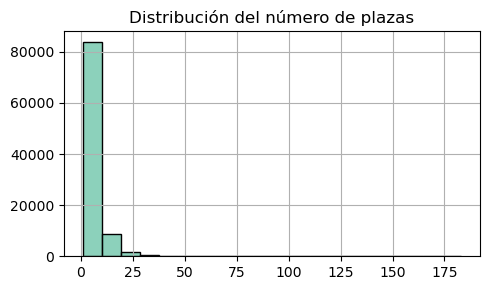

In [10]:
plt.figure(figsize=(5, 3))

sns.histplot(data=df_calles, x='num_plazas', bins=20, color=sns.color_palette('Set2')[0], edgecolor='black')
plt.title('Distribución del número de plazas')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

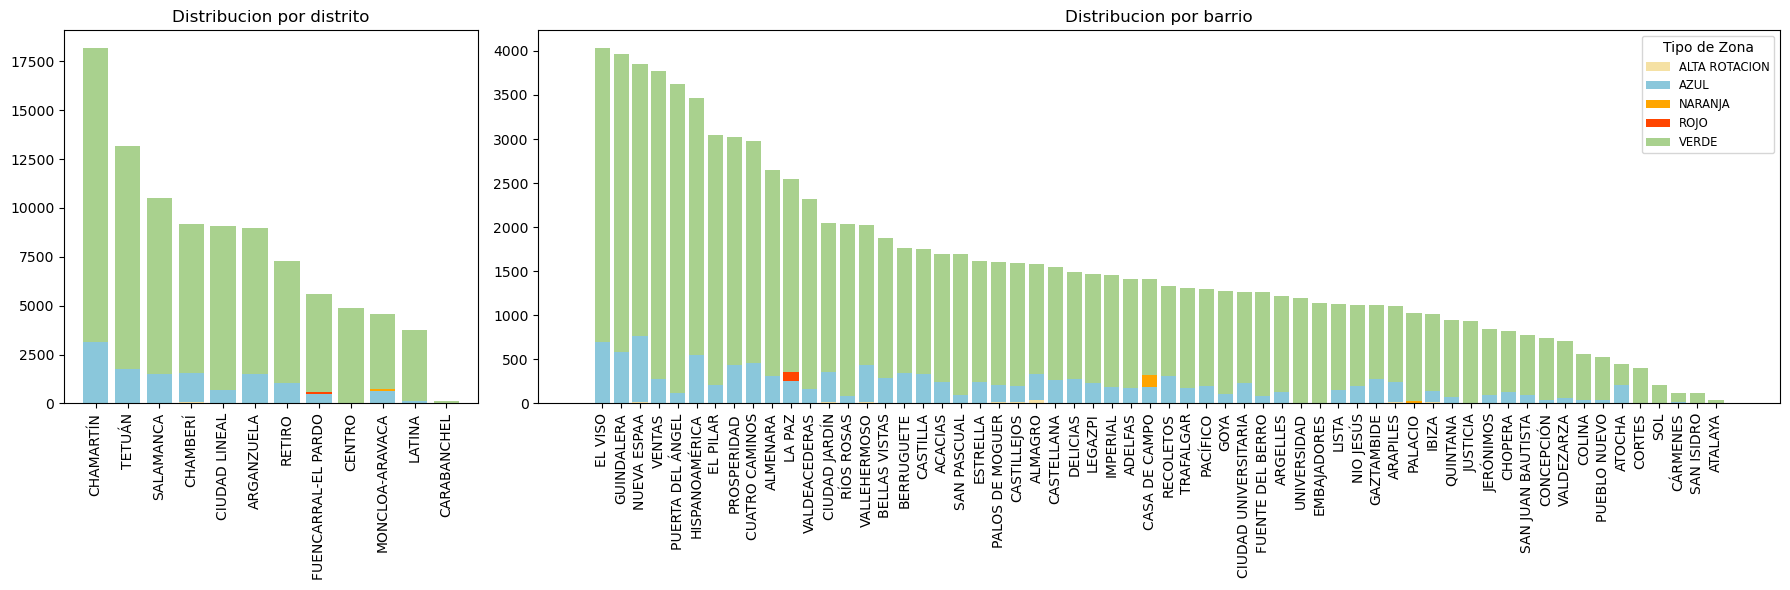

In [11]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

plt.figure(figsize=(18, 6))
grid = plt.GridSpec(1, 2, width_ratios=[1, 3])

# Primer subplot: Distribucion del distrito
grouped_df_calles = df_calles.dropna(subset=['distrito', 'tipo_zona']).groupby(['distrito', 'tipo_zona']).size().reset_index(name='count')
pivoted_df_calles = grouped_df_calles.pivot(index='distrito', columns='tipo_zona', values='count').fillna(0)
pivoted_df_calles = pivoted_df_calles.loc[pivoted_df_calles.sum(axis=1).sort_values(ascending=False).index]

ax1 = plt.subplot(grid[0])
bottom1 = None
for col in pivoted_df_calles.columns:
    ax1.bar(pivoted_df_calles.index, pivoted_df_calles[col], bottom=bottom1, label=col, color=palette.get(col, '#333333'))
    if bottom1 is None:
        bottom1 = pivoted_df_calles[col].values
    else:
        bottom1 += pivoted_df_calles[col].values
ax1.set_title('Distribucion por distrito')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=90)
ax1.ticklabel_format(style='plain', axis='y')

# Segundo subplot: Distribucion del barrio
grouped_df_calles = df_calles.dropna(subset=['barrio', 'tipo_zona']).groupby(['barrio', 'tipo_zona']).size().reset_index(name='count')
pivoted_df_calles = grouped_df_calles.pivot(index='barrio', columns='tipo_zona', values='count').fillna(0)
pivoted_df_calles = pivoted_df_calles.loc[pivoted_df_calles.sum(axis=1).sort_values(ascending=False).index]

ax2 = plt.subplot(grid[1])
bottom2 = None
for col in pivoted_df_calles.columns:
    ax2.bar(pivoted_df_calles.index, pivoted_df_calles[col], bottom=bottom2, label=col, color=palette.get(col, '#333333'))
    if bottom2 is None:
        bottom2 = pivoted_df_calles[col].values
    else:
        bottom2 += pivoted_df_calles[col].values

ax2.set_title('Distribucion por barrio')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(title='Tipo de Zona', loc='upper right', fontsize='small')
ax2.tick_params(axis='x', rotation=90)
ax2.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


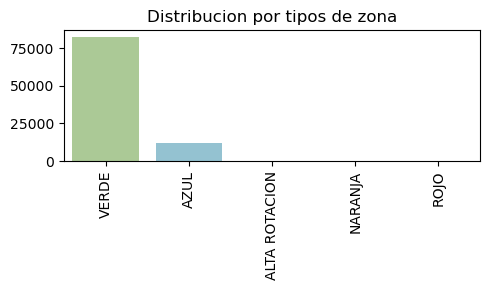

In [12]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

plt.figure(figsize=(5, 3))

sns.countplot(x='tipo_zona', data=df_calles, order=df_calles['tipo_zona'].value_counts().index, palette=palette)
plt.title('Distribucion por tipos de zona')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

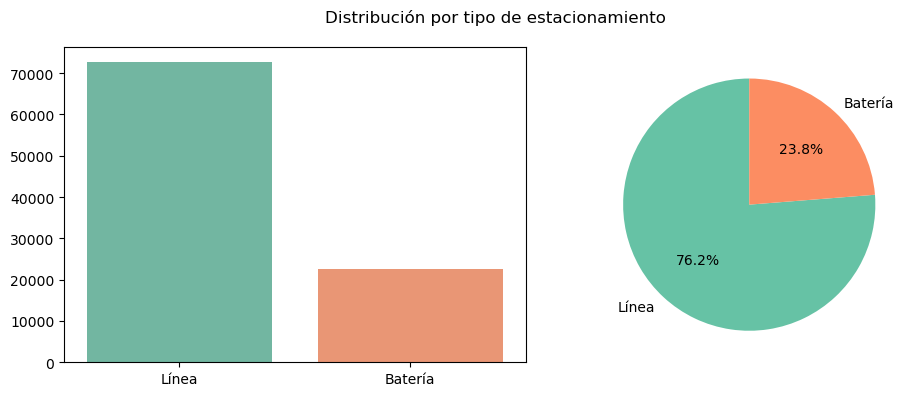

In [13]:
palette = {
    'ALTA ROTACION': '#F5E1A4',     
    'AZUL': '#8AC7DB',
    'AZUL SANITARIA': '#6BAEC5',
    'COMERCIALES': '#FCD692',
    'TALLERES': '#D7A4FF',
    'USO DISUASORIO': '#FFB3B3',
    'VERDE': '#A9D18E',
    'ROJO': '#FF4500',
    'NARANJA': '#FFA500'
}

fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

# Primer subplot: Distribución del tipo de aparcamiento, gráfico barras
ax0 = fig.add_subplot(gs[0, 0])
sns.countplot(x='bateria_linea', data=df_calles, order=df_calles['bateria_linea'].value_counts().index, palette='Set2', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')

# Segundo subplot: Distribución del tipo de aparcamiento, gráfico de pastel
ax1 = fig.add_subplot(gs[0, 1])
bateria_counts = df_calles['bateria_linea'].value_counts()
ax1.pie(bateria_counts, labels=bateria_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

fig.suptitle('Distribución por tipo de estacionamiento')
fig.tight_layout()
plt.show()